K-means clustering Applied on original datapoints without PCA:

No. of clusters: 10
Time required: 1.176112413406372 seconds
Dataset Size: 115008


K-means clustering Applied 2 Dimension:

No. of clusters: 10
Time required: 1.176112413406372 seconds
Dataset Size: 3594

Visualizing for 2- Dimensions




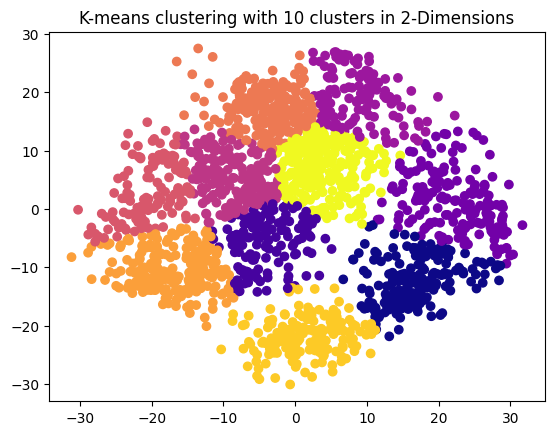



K-means clustering Applied 3-Dimension:

No. of clusters: 10
Time required: 1.176112413406372 seconds
Dataset Size: 5391

Visualizing for 3_Dimensions




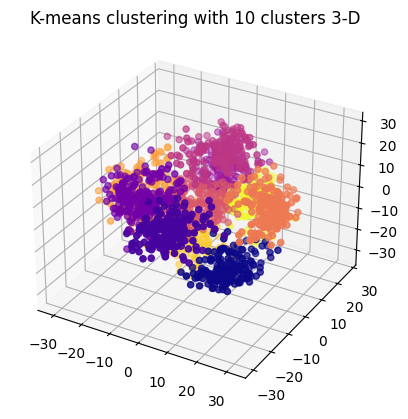

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Question 1:
from sklearn.datasets import load_digits 
X = load_digits().data
k = 10
iterations = 100

#define Function for K-Means Clustering

def kmeans(data,clusters,iters):
  centroids = data[np.random.choice(data.shape[0], k, replace=False), :] #Choosing random Centers using Numpy

  for i in range(iters):
    labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1) # getting nearest Center

    for j in range(k):
      centroids[j] = np.mean(data[labels == j], axis=0) # Updating Centroids

  return centroids, labels

#Defining Function for PCA
def pca(X,dimension):

    X = X - X.mean(axis=0) 
    covariance = np.cov(X , rowvar = False) #Covariance Matrix

    eig_values, eig_vectors = np.linalg.eigh(covariance)

    # Getting the first no. dimensions eigenvectors eg. 2 or 3
    sorted = eig_vectors[:,np.argsort(eig_values)[::-1]]
    eigvecs = sorted[:,0:dimension]
    
    projected_pca = np.dot(eigvecs.T, X.T).T  # Transforming the data

    return projected_pca

#Question 2:
start_time = time.time()
centroid, labels = kmeans(X, k, iterations)
end_time = time.time()
duration = end_time-start_time
print("K-means clustering Applied on original datapoints without PCA:\n")
print("No. of clusters:", k)
print("Time required:", duration, "seconds")
print("Dataset Size:", X.size)

#Question 3,4:

# Applying PCA for 2 Dimensions
projected_pca = pca(X, 2)

#Perform K-Means again on the reduced dimension datapoints
start_time_2d = time.time()
centroid, labels = kmeans(projected_pca, k, iterations)
end_time_2d = time.time()
duration_2d = end_time_2d-start_time_2d
print("\n\nK-means clustering Applied 2 Dimension:\n")
print("No. of clusters:", k)
print("Time required:", duration, "seconds")
print("Dataset Size:", projected_pca.size)


#Visualizing
print("\nVisualizing for 2- Dimensions\n\n")
plt.scatter(projected_pca[:,0], projected_pca[:,1], c=labels, cmap="plasma")
plt.title("K-means clustering with 10 clusters in 2-Dimensions")
plt.show()

#Question 5:
#With dimension 3
projected_pca = pca(X, 3)

#Perform K-Means again on the reduced dimension datapoints
start_time_3d = time.time()
centroid, labels = kmeans(projected_pca, k, iterations)
end_time_3d = time.time()
duration_3d = end_time_3d-start_time_3d
print("\n\nK-means clustering Applied 3-Dimension:\n")
print("No. of clusters:", k)
print("Time required:", duration, "seconds")
print("Dataset Size:", projected_pca.size)


#Visualizing
print("\nVisualizing for 3_Dimensions\n\n")
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(projected_pca[:,0], projected_pca[:,1], projected_pca[:,2], c=labels, cmap="plasma")
ax.set_title("K-means clustering with 10 clusters 3-D")
plt.show()